In [29]:
import os
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [30]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
zip_path = "/content/drive/My Drive/Fruit Classification.zip"
!unzip -q "/content/drive/My Drive/Fruit Classification.zip" -d "/content/"

replace /content/Fruit Classification/Dataset-Description-3.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [32]:
train_dir = "/content/Fruit Classification/Train"
test_dir = "/content/Fruit Classification/Test"

# Task 1: Data Understanding and Visualization:

1. Load and visualize images from a dataset stored in directories, where each subdirec-
tory represents a class. You are expected to write a code:


• Get the list of class directories from the train folder.

• Select one image randomly from each class.

• Display the images in a grid format with two rows using matplotlib.

In [33]:
import os
# Define dataset path
train_dir = "/content/Fruit Classification/Train"
# Get class names (subdirectories)
class_names = sorted(os.listdir(train_dir))
if not class_names:
  print("No class directories found in the train folder!")
else:
  print(f"Found {len(class_names)} classes: {class_names}")

Found 5 classes: ['Banana', 'Cherry', 'Grape', 'Mango', 'Peach']


In [34]:
import os

def count_images_in_dir(base_dir):
    total_count = 0
    for class_name in os.listdir(base_dir):
        class_path = os.path.join(base_dir, class_name)
        if os.path.isdir(class_path):
            total_count += len([
                img for img in os.listdir(class_path)
                if os.path.isfile(os.path.join(class_path, img))
            ])
    return total_count

# Set your train and test directory paths
train_dir = "/content/Fruit Classification/Train"
test_dir = "/content/Fruit Classification/Test"

train_image_count = count_images_in_dir(train_dir)
test_image_count = count_images_in_dir(test_dir)

print(f"Total images in train set: {train_image_count}")
print(f"Total images in test set: {test_image_count}")


Total images in train set: 6277
Total images in test set: 5


In [35]:
from PIL import Image, UnidentifiedImageError
import os

corrupted_images = []  # List to store corrupted image paths

# Loop through each class folder and check for corrupted images
for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)

    if os.path.isdir(class_path):  # Ensure it's a valid directory
        images = os.listdir(class_path)

        for img_name in images:
            img_path = os.path.join(class_path, img_name)

            try:
                with Image.open(img_path) as img:
                    img.verify()
            except (IOError, UnidentifiedImageError):
                corrupted_images.append(img_path)

# Print results
if corrupted_images:
    print(f"\nTotal Corrupted Images Found: {len(corrupted_images)}")
    print("Corrupted Image Paths:")
    for img in corrupted_images:
        print(img)
else:
    print("\nNo corrupted images found.")



Total Corrupted Images Found: 35
Corrupted Image Paths:
/content/Fruit Classification/Train/Banana/r_14_100.jpg
/content/Fruit Classification/Train/Banana/r_227_100.jpg
/content/Fruit Classification/Train/Banana/r_162_100.jpg
/content/Fruit Classification/Train/Banana/r2_73_100.jpg
/content/Fruit Classification/Train/Banana/136_100.jpg
/content/Fruit Classification/Train/Banana/22_100(1).jpg
/content/Fruit Classification/Train/Banana/r_95_100.jpg
/content/Fruit Classification/Train/Cherry/r_302_100.jpg
/content/Fruit Classification/Train/Cherry/r_202_100.jpg
/content/Fruit Classification/Train/Cherry/r_262_100(1).jpg
/content/Fruit Classification/Train/Cherry/r2_108_100.jpg
/content/Fruit Classification/Train/Cherry/r_269_100.jpg
/content/Fruit Classification/Train/Cherry/r_136_100(1).jpg
/content/Fruit Classification/Train/Cherry/r_217_100.jpg
/content/Fruit Classification/Train/Grape/r_209_100.jpg
/content/Fruit Classification/Train/Grape/r_354_100.jpg
/content/Fruit Classification/

In [41]:
from PIL import Image, UnidentifiedImageError
import os

train_dir = "/content/Fruit Classification/Train"  # Change if needed
class_names = os.listdir(train_dir)  # Automatically detect class folders

corrupted_images = []

# Step 1: Detect corrupted images
for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)

    if os.path.isdir(class_path):
        images = os.listdir(class_path)

        for img_name in images:
            img_path = os.path.join(class_path, img_name)

            try:
                with Image.open(img_path) as img:
                    img.verify()
            except (IOError, UnidentifiedImageError):
                corrupted_images.append(img_path)

# Step 2: Delete corrupted images
print(f"\nTotal Corrupted Images Found: {len(corrupted_images)}")
for img_path in corrupted_images:
    try:
        os.remove(img_path)
        print(f"Deleted: {img_path}")
    except Exception as e:
        print(f"Failed to delete {img_path}: {e}")



Total Corrupted Images Found: 35
Deleted: /content/Fruit Classification/Train/Banana/r_14_100.jpg
Deleted: /content/Fruit Classification/Train/Banana/r_227_100.jpg
Deleted: /content/Fruit Classification/Train/Banana/r_162_100.jpg
Deleted: /content/Fruit Classification/Train/Banana/r2_73_100.jpg
Deleted: /content/Fruit Classification/Train/Banana/136_100.jpg
Deleted: /content/Fruit Classification/Train/Banana/22_100(1).jpg
Deleted: /content/Fruit Classification/Train/Banana/r_95_100.jpg
Deleted: /content/Fruit Classification/Train/Peach/r_230_100.jpg
Deleted: /content/Fruit Classification/Train/Peach/r2_180_100.jpg
Deleted: /content/Fruit Classification/Train/Peach/r_102_100(1).jpg
Deleted: /content/Fruit Classification/Train/Peach/130_100.jpg
Deleted: /content/Fruit Classification/Train/Peach/r_204_100.jpg
Deleted: /content/Fruit Classification/Train/Peach/r_128_100.jpg
Deleted: /content/Fruit Classification/Train/Peach/r2_260_100.jpg
Deleted: /content/Fruit Classification/Train/Cherr

In [42]:
from PIL import Image, UnidentifiedImageError
import os

corrupted_images = []  # List to store corrupted image paths

# Loop through each class folder and check for corrupted images
for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)

    if os.path.isdir(class_path):  # Ensure it's a valid directory
        images = os.listdir(class_path)

        for img_name in images:
            img_path = os.path.join(class_path, img_name)

            try:
                with Image.open(img_path) as img:
                    img.verify()
            except (IOError, UnidentifiedImageError):
                corrupted_images.append(img_path)

# Print results
if corrupted_images:
    print(f"\nTotal Corrupted Images Found: {len(corrupted_images)}")
    print("Corrupted Image Paths:")
    for img in corrupted_images:
        print(img)
else:
    print("\nNo corrupted images found.")



No corrupted images found.


**3.1.1 Data Understanding, Analysis, Visualization, and Cleaning**

Total Images: 6242
Class Distribution: {'Banana': 1422, 'Cherry': 1222, 'Grape': 1468, 'Mango': 908, 'Peach': 1222}


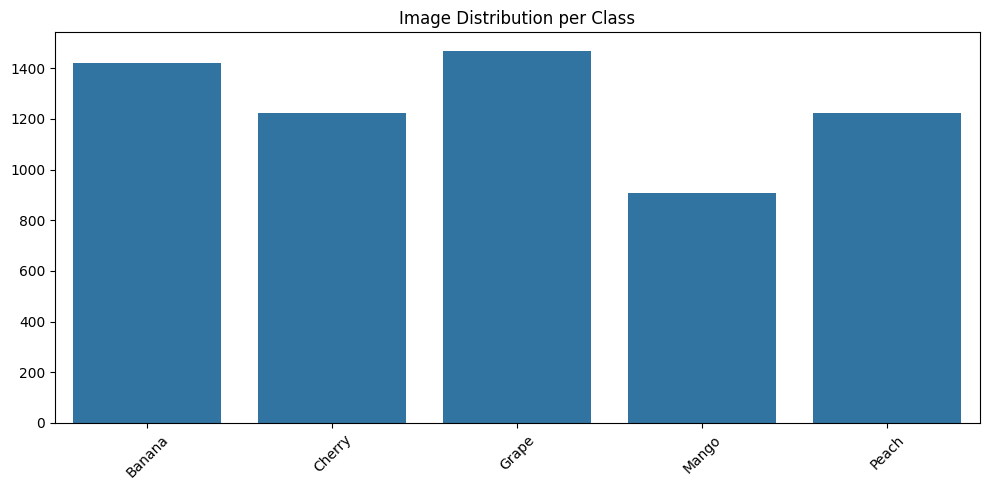

Found 4996 images belonging to 5 classes.
Found 1246 images belonging to 5 classes.


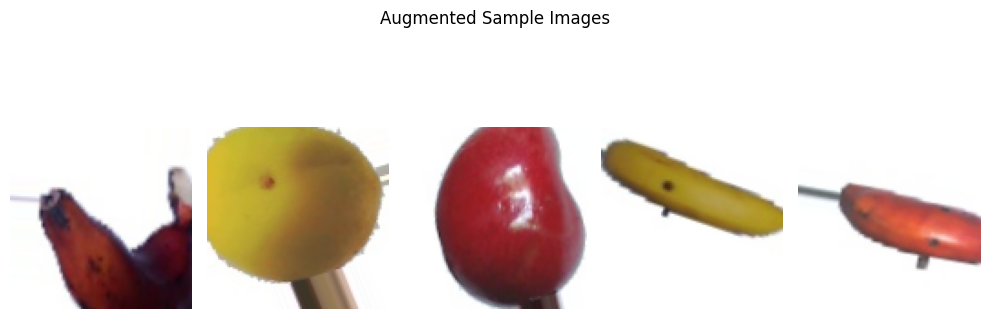

In [43]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set path to the main train directory
train_dir = '/content/Fruit Classification/Train'

# Count total images and class distribution
total_images = 0
class_names = sorted(os.listdir(train_dir))
class_counts = {}

for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)
    num_images = len(os.listdir(class_path))
    total_images += num_images
    class_counts[class_name] = num_images

print(f"Total Images: {total_images}")
print("Class Distribution:", class_counts)

# Visualize class distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.title("Image Distribution per Class")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Data generator with 20% validation split
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 80% train, 20% validation
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Training generator
train_gen = datagen.flow_from_directory(
    train_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42
)

# Validation generator
val_gen = datagen.flow_from_directory(
    train_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False,
    seed=42
)

# Visualize some augmented sample images from training data
sample_images, _ = next(train_gen)
plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(sample_images[i])
    plt.axis("off")
plt.suptitle("Augmented Sample Images")
plt.tight_layout()
plt.show()


**3.1.2 Baseline CNN Model**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │     1,638,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,742,277 (6.65 MB)

 Trainable params: 1,742,277 (6.65 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/4
157/157 ━━━━━━━━━━━━━━━━━━━━ 27s 153ms/step - accuracy: 0.6415 - loss: 0.9293 - val_accuracy: 0.8997 - val_loss: 0.2782
Epoch 2/4
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 125ms/step - accuracy: 0.9608 - loss: 0.1113 - val_accuracy: 0.9663 - val_loss: 0.0893
Epoch 3/4
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 136ms/step - accuracy: 0.9739 - loss: 0.0737 - val_accuracy: 0.9783 - val_loss: 0.0658
Epoch 4/4
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 135ms/step - accuracy: 0.9847 - loss: 0.0464 - val_accuracy: 0.9510 - val_loss: 0.1125


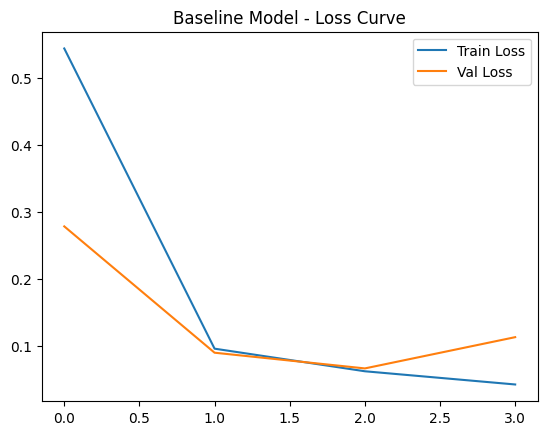

In [44]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Baseline CNN Model
baseline_model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(train_gen.num_classes, activation='softmax')
])

baseline_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
baseline_model.summary()

# Training
history = baseline_model.fit(train_gen, epochs=4, validation_data=val_gen)

# Loss Plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Baseline Model - Loss Curve")
plt.legend()
plt.show()


**3.1.3 Deeper CNN with Regularization**

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)              │ (None, 98, 98, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 98, 98, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 47, 47, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 47, 47, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 21, 21, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 21, 21, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 256)            │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,046,085 (7.81 MB)

 Trainable params: 2,044,677 (7.80 MB)

 Non-trainable params: 1,408 (5.50 KB)

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 42s 205ms/step - accuracy: 0.6203 - loss: 1.6974 - val_accuracy: 0.1453 - val_loss: 6.9469
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 136ms/step - accuracy: 0.8317 - loss: 0.5059 - val_accuracy: 0.1316 - val_loss: 14.8499
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 22s 143ms/step - accuracy: 0.9085 - loss: 0.2858 - val_accuracy: 0.4117 - val_loss: 8.3203
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 22s 142ms/step - accuracy: 0.9225 - loss: 0.2903 - val_accuracy: 0.8860 - val_loss: 0.3863
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 134ms/step - accuracy: 0.9345 - loss: 0.2383 - val_accuracy: 0.9342 - val_loss: 0.3472


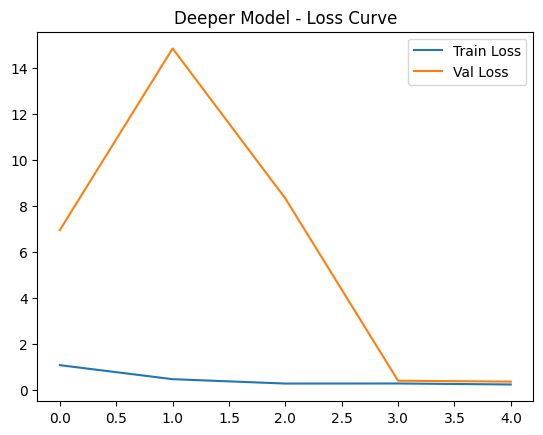

In [45]:
# Deeper CNN with regularization
deeper_model = models.Sequential([
    layers.Conv2D(64, (3,3), activation='relu', input_shape=(100, 100, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.3),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.3),

    layers.Conv2D(256, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.3),

    layers.Conv2D(256, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.3),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_gen.num_classes, activation='softmax')
])

deeper_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
deeper_model.summary()

# Training
deep_history = deeper_model.fit(train_gen, epochs=5, validation_data=val_gen)

# Loss Plot
plt.plot(deep_history.history['loss'], label='Train Loss')
plt.plot(deep_history.history['val_loss'], label='Val Loss')
plt.title("Deeper Model - Loss Curve")
plt.legend()
plt.show()


**3.1.4 Experimentation and Comparative Analysis**


Baseline Model Evaluation:
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step
              precision    recall  f1-score   support

      Banana       1.00      0.96      0.98       284
      Cherry       1.00      0.99      1.00       244
       Grape       1.00      0.87      0.93       293
       Mango       0.90      1.00      0.95       181
       Peach       0.89      1.00      0.94       244

    accuracy                           0.96      1246
   macro avg       0.96      0.96      0.96      1246
weighted avg       0.96      0.96      0.96      1246


Deeper Model Evaluation:
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step
              precision    recall  f1-score   support

      Banana       1.00      0.81      0.89       284
      Cherry       0.86      1.00      0.92       244
       Grape       0.95      1.00      0.97       293
       Mango       1.00      0.78      0.88       181
       Peach       0.87      1.00      0.93       244

    accuracy                           0.92      

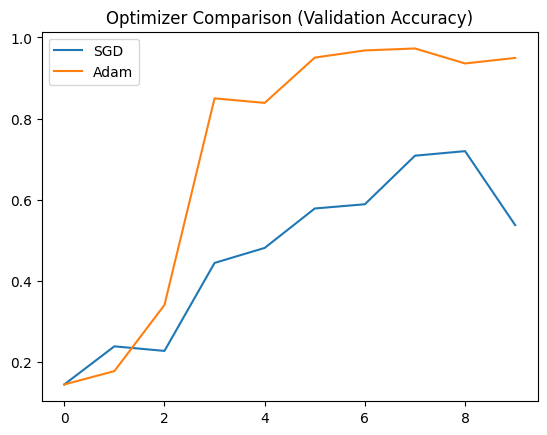

In [46]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Evaluation
def evaluate_model(model, generator):
    Y_pred = model.predict(generator)
    y_pred = np.argmax(Y_pred, axis=1)
    y_true = generator.classes
    print(classification_report(y_true, y_pred, target_names=generator.class_indices.keys()))

print("\nBaseline Model Evaluation:")
evaluate_model(baseline_model, val_gen)

print("\nDeeper Model Evaluation:")
evaluate_model(deeper_model, val_gen)

# Optimizer Comparison
from tensorflow.keras.optimizers import SGD, Adam

# SGD model
deeper_model_sgd = tf.keras.models.clone_model(deeper_model)
deeper_model_sgd.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])
history_sgd = deeper_model_sgd.fit(train_gen, epochs=10, validation_data=val_gen)

# Adam model
deeper_model_adam = tf.keras.models.clone_model(deeper_model)
deeper_model_adam.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history_adam = deeper_model_adam.fit(train_gen, epochs=10, validation_data=val_gen)

# Plot Comparison
plt.plot(history_sgd.history['val_accuracy'], label='SGD')
plt.plot(history_adam.history['val_accuracy'], label='Adam')
plt.title("Optimizer Comparison (Validation Accuracy)")
plt.legend()
plt.show()


**Part B: Fine-Tuning a Pre-Trained Model (Transfer Learning).**

In [47]:
#Load VGG16
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional base
for layer in base_model.layers:
    layer.trainable = False

# custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Final model
vgg_model = Model(inputs=base_model.input, outputs=predictions)


In [48]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
import numpy as np

# 3.2.1) Loading and Adapting a Pre-Trained Model---------)
train_dir = '/content/Fruit Classification/Train'
val_dir = '/content/Fruit Classification/Train'
img_size = (224, 224)
batch_size = 32

# 1. Data Preprocessing
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20,
                                 width_shift_range=0.2, height_shift_range=0.2,
                                 shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(train_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical')
val_gen = val_datagen.flow_from_directory(val_dir, target_size=img_size, batch_size=1, class_mode='categorical', shuffle=False)

num_classes = train_gen.num_classes

# 2. Load VGG16 Base Model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# 3. Add Custom Layers (similar to your VGG example)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=outputs)

# 3.2.2) Model Training and Fine-Tuning---------)

# a) Feature Extraction Phase...........

# 4. Compile Model
model.compile(optimizer=Adam(learning_rate=0.0005),  # Using your VGG learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 5. Train Top Layers
model.fit(train_gen, validation_data=val_gen, epochs=4)

# b) Fine-Tuning Phase..................

# 6. Unfreeze Some Base Layers for Fine-Tuning---------)
base_model.trainable = True
# Typically, we fine-tune the later blocks of VGG
for layer in base_model.layers[:15]:  # Freeze first 15 layers
    layer.trainable = False

# 7. Compile and Fine-Tune with lower learning rate
model.compile(optimizer=Adam(learning_rate=0.00001),  # Very small LR for fine-tuning
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_gen, validation_data=val_gen, epochs=4)

# 3.2.3) Model Evaluation and Prediction---------)

# 8. Evaluate Model
loss, accuracy = model.evaluate(val_gen)
print(f"\nTest Accuracy: {accuracy:.4f}")

# 9. Classification Report
Y_pred = model.predict(val_gen)
y_pred = np.argmax(Y_pred, axis=1)
true_classes = val_gen.classes
class_labels = list(val_gen.class_indices.keys())

print("\nClassification Report:")
print(classification_report(true_classes, y_pred, target_names=class_labels))

Found 6242 images belonging to 5 classes.
Found 6242 images belonging to 5 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/4
196/196 ━━━━━━━━━━━━━━━━━━━━ 150s 748ms/step - accuracy: 0.4065 - loss: 1.4063 - val_accuracy: 0.8864 - val_loss: 0.5174
Epoch 2/4
196/196 ━━━━━━━━━━━━━━━━━━━━ 146s 745ms/step - accuracy: 0.7943 - loss: 0.6012 - val_accuracy: 0.9531 - val_loss: 0.1990
Epoch 3/4
196/196 ━━━━━━━━━━━━━━━━━━━━ 143s 729ms/step - accuracy: 0.8901 - loss: 0.3286 - val_accuracy: 0.9854 - val_loss: 0.0947
Epoch 4/4
196/196 ━━━━━━━━━━━━━━━━━━━━ 168s 860ms/step - accuracy: 0.9413 - loss: 0.1897 - val_accuracy: 0.9705 - val_loss: 0.0889
Epoch 1/4
196/196 ━━━━━━━━━━━━━━━━━━━━ 149s 746ms/step - accuracy: 0.9478 - loss: 0.1564 - val_accuracy: 0.9888 - val_loss: 0.0538
Epoch 2/4
196/196 ━━━━━━━━━━━━━━━━━━━━ 143s 732ms/step - accuracy: 0.9614 - loss: 0.1387 - val_accuracy: 0.9910 - val_loss: 0.0494
Epoch 3/4
196/196 ━━━━━━━━━━━━━━━━━━━━ 146s 745ms/step - accuracy: 0.9650 - loss: 0.1213 - val_accuracy: 0.9915 - val_loss: 0.0478
Epoch 4/4
196/196 ━━━━━━━━━━━━━━━━━━━━ 142s 726ms/step - accuracy: 0.9685 - loss: 0

6242/6242 ━━━━━━━━━━━━━━━━━━━━ 60s 10ms/step


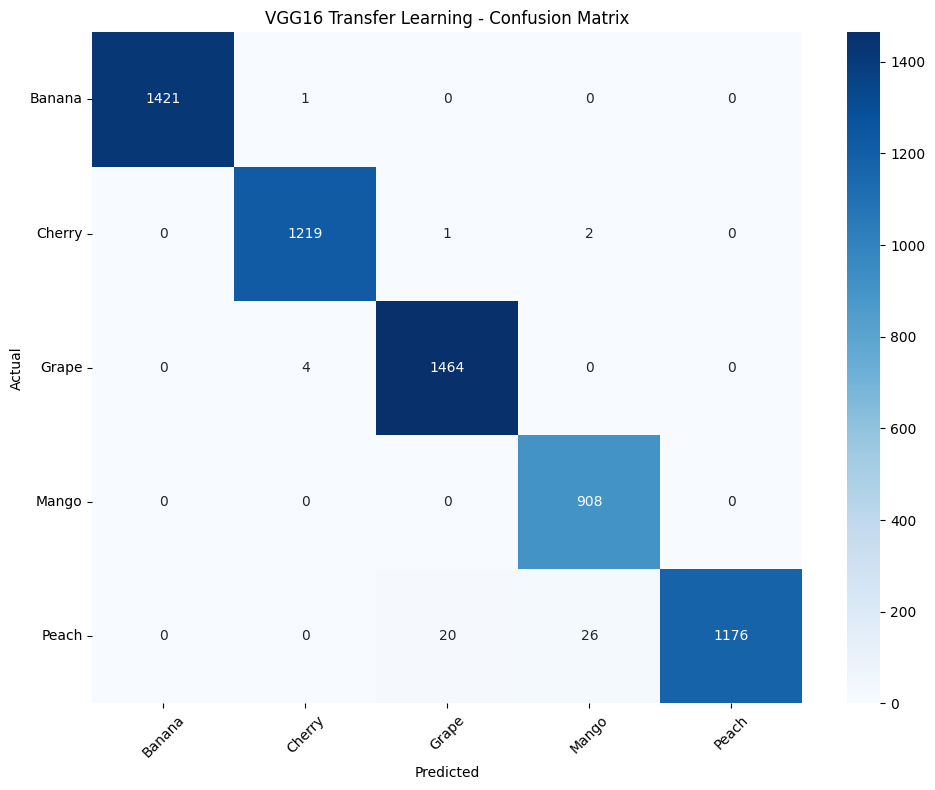


Classification Report:
              precision    recall  f1-score   support

      Banana       1.00      1.00      1.00      1422
      Cherry       1.00      1.00      1.00      1222
       Grape       0.99      1.00      0.99      1468
       Mango       0.97      1.00      0.98       908
       Peach       1.00      0.96      0.98      1222

    accuracy                           0.99      6242
   macro avg       0.99      0.99      0.99      6242
weighted avg       0.99      0.99      0.99      6242



In [49]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# [Keep all your previous code until after model evaluation]

# 9. Generate predictions and get class indices
Y_pred = model.predict(val_gen)
y_pred_classes = np.argmax(Y_pred, axis=1)
true_classes = val_gen.classes
class_labels = list(val_gen.class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(true_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.title("VGG16 Transfer Learning - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(true_classes, y_pred_classes, target_names=class_labels))